In [4]:
import torch
import torch.nn as nn
import torch.utils.data as data_utils
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np

In [59]:
# A simple 2 layer neural network
class NNModel(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super(NNModel, self).__init__()

    self.fc1 = nn.Linear(input_dim, hidden_dim)
    self.sigmoid = nn.Sigmoid()
    self.fc2 = nn.Linear(hidden_dim, output_dim)
  
  def forward(self, x):
    out = self.fc1(x)
    out = self.sigmoid(out)
    out = self.fc2(out)
    return out

loss = nn.MSELoss()

In [60]:
def load_tensors(features, labels):
  features_tensor = torch.Tensor(features)
  labels_tensor = torch.Tensor(labels)
  return data_utils.TensorDataset(features_tensor, labels_tensor)

def train_loader(features, labels, batch_size):
  tensor_dataset = load_tensors(features, labels)
  loader = data_utils.DataLoader(tensor_dataset, batch_size=batch_size, shuffle=True)
  return loader

In [61]:
#Load simple encoded data
X_simple_test = np.load('../../training_sets/Xtest_simple_set_data.npy', allow_pickle=True)
X_simple_train = np.load('../../training_sets/Xtrain_simple_set_data.npy', allow_pickle=True)
X_simple_val = np.load('../../training_sets/Xvalidate_simple_set_data.npy', allow_pickle=True)

Y_simple_test = np.load('../../training_sets/Ytest_simple_set_data.npy', allow_pickle=True)
Y_simple_train = np.load('../../training_sets/Ytrain_simple_set_data.npy', allow_pickle=True)
Y_simple_val = np.load('../../training_sets/Yvalidate_simple_set_data.npy', allow_pickle=True)

In [62]:
def train_model(model, df_features=X_simple_train, df_labels=Y_simple_train, n_iters=10000, batch_size=50, learning_rate=0.01):
    dataframe_len=len(df_features)
    loader = train_loader(features=df_features, labels=df_labels, batch_size=batch_size)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    num_epochs = int(n_iters / (dataframe_len / batch_size))
    running_losses = []
    running_accuracy = []
    running_epoch = []
    
    for epoch in range(num_epochs):
        for i,(x_train,y_train) in enumerate(loader):
            y_pred = model(x_train)
            cost = loss(y_pred,y_train)
            optimizer.zero_grad()
            cost.backward()
            optimizer.step()
        running_losses.append(cost)
        running_epoch.append(epoch)
        if epoch % 500 == 0 and epoch != 0:
                print('epoch: ' + str(epoch) + ' cost: ' + str(cost))
    with torch.no_grad():
        plt.subplot(122)
        plt.plot(running_epoch, running_losses)
        plt.title('Running Losses vs Epoch')
        plt.show()
    return model
  


First Model
epoch: 500 cost: tensor(42228.9297, grad_fn=<MseLossBackward0>)
epoch: 1000 cost: tensor(32967.5938, grad_fn=<MseLossBackward0>)
epoch: 1500 cost: tensor(46031.6719, grad_fn=<MseLossBackward0>)
epoch: 2000 cost: tensor(43906.0391, grad_fn=<MseLossBackward0>)
epoch: 2500 cost: tensor(50522.9844, grad_fn=<MseLossBackward0>)


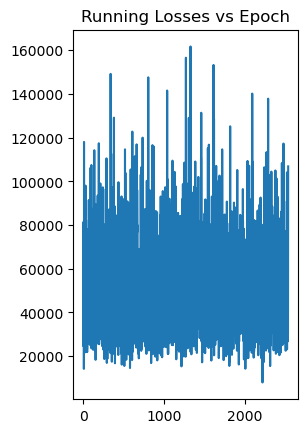

Second Model
epoch: 500 cost: tensor(27388.8242, grad_fn=<MseLossBackward0>)
epoch: 1000 cost: tensor(64326.4648, grad_fn=<MseLossBackward0>)
epoch: 1500 cost: tensor(73374.4922, grad_fn=<MseLossBackward0>)
epoch: 2000 cost: tensor(29288.9473, grad_fn=<MseLossBackward0>)
epoch: 2500 cost: tensor(29741.5566, grad_fn=<MseLossBackward0>)
epoch: 3000 cost: tensor(33356.0156, grad_fn=<MseLossBackward0>)
epoch: 3500 cost: tensor(30161.3574, grad_fn=<MseLossBackward0>)


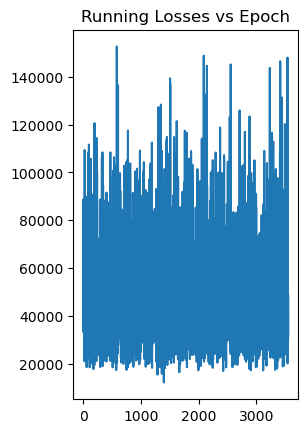

Third Model
epoch: 500 cost: tensor(30299.0918, grad_fn=<MseLossBackward0>)
epoch: 1000 cost: tensor(33615.3125, grad_fn=<MseLossBackward0>)
epoch: 1500 cost: tensor(27600.7090, grad_fn=<MseLossBackward0>)
epoch: 2000 cost: tensor(36051.5977, grad_fn=<MseLossBackward0>)
epoch: 2500 cost: tensor(37114.5586, grad_fn=<MseLossBackward0>)
epoch: 3000 cost: tensor(44399.2695, grad_fn=<MseLossBackward0>)
epoch: 3500 cost: tensor(52195.9180, grad_fn=<MseLossBackward0>)


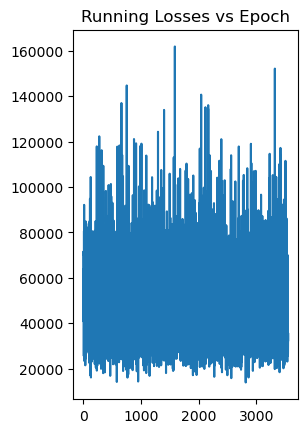

Fourth Model
epoch: 500 cost: tensor(50593.0586, grad_fn=<MseLossBackward0>)
epoch: 1000 cost: tensor(42809.1758, grad_fn=<MseLossBackward0>)
epoch: 1500 cost: tensor(68730.5547, grad_fn=<MseLossBackward0>)
epoch: 2000 cost: tensor(58858.6445, grad_fn=<MseLossBackward0>)
epoch: 2500 cost: tensor(31938.6035, grad_fn=<MseLossBackward0>)
epoch: 3000 cost: tensor(35486.0195, grad_fn=<MseLossBackward0>)
epoch: 3500 cost: tensor(62107.1758, grad_fn=<MseLossBackward0>)
epoch: 4000 cost: tensor(38715.5195, grad_fn=<MseLossBackward0>)
epoch: 4500 cost: tensor(43072.0195, grad_fn=<MseLossBackward0>)
epoch: 5000 cost: tensor(61191.5977, grad_fn=<MseLossBackward0>)


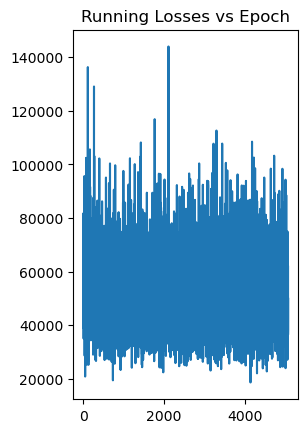

Fifth Model
epoch: 500 cost: tensor(68274.9688, grad_fn=<MseLossBackward0>)
epoch: 1000 cost: tensor(55502.1445, grad_fn=<MseLossBackward0>)
epoch: 1500 cost: tensor(50944.5781, grad_fn=<MseLossBackward0>)
epoch: 2000 cost: tensor(94657.3828, grad_fn=<MseLossBackward0>)
epoch: 2500 cost: tensor(23100.9277, grad_fn=<MseLossBackward0>)


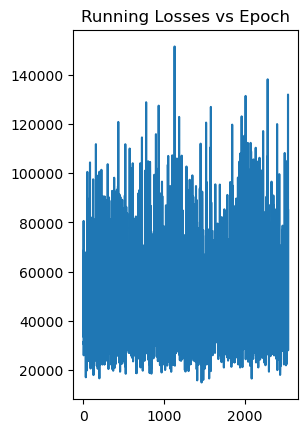

In [33]:
#Simple Encoding
print("First Model")
first_model = NNModel(input_dim=22, hidden_dim=10, output_dim=1)
first_model = train_model(model=first_model, n_iters=50000, batch_size=50, learning_rate=1e-5)
print("Second Model")
second_model = NNModel(input_dim=22, hidden_dim=10, output_dim=1)
second_model = train_model(model=second_model, n_iters=70000, batch_size=50, learning_rate=1.1e-5)
print("Third Model")
third_model = NNModel(input_dim=22, hidden_dim=10, output_dim=1)
third_model = train_model(model=third_model, n_iters=70000, batch_size=50, learning_rate=0.9e-5)
print("Fourth Model")
fourth_model = NNModel(input_dim=22, hidden_dim=10, output_dim=1)
fourth_model = train_model(model=fourth_model, n_iters=50000, batch_size=100, learning_rate=0.8e-5)
print("Fifth Model")
fifth_model = NNModel(input_dim=22, hidden_dim=10, output_dim=1)
fifth_model = train_model(model=fifth_model, n_iters=50000, batch_size=50, learning_rate=1e-5)

In [67]:
# Let's use the validation sets on our models
tensor_simple_X_val = torch.Tensor(X_simple_val)
tensor_simple_Y_val = torch.Tensor(Y_simple_val)

y_pred = first_model(tensor_simple_X_val)
cost = loss(y_pred, tensor_simple_Y_val)
print("Cost first model: " + str(cost))

y_pred = second_model(tensor_simple_X_val)
cost = loss(y_pred, tensor_simple_Y_val)
print("Cost second model: " + str(cost))

y_pred = third_model(tensor_simple_X_val)
cost = loss(y_pred, tensor_simple_Y_val)
print("Cost third model: " + str(cost))

y_pred = fourth_model(tensor_simple_X_val)
cost = loss(y_pred, tensor_simple_Y_val)
print("Cost fourth model: " + str(cost))

y_pred = fifth_model(tensor_simple_X_val)
cost = loss(y_pred, tensor_simple_Y_val)
print("Cost fifth model: " + str(cost))

Cost first model: tensor(35884.7188, grad_fn=<MseLossBackward0>)
Cost second model: tensor(55429.3828, grad_fn=<MseLossBackward0>)
Cost third model: tensor(35468.2734, grad_fn=<MseLossBackward0>)
Cost fourth model: tensor(35308.2031, grad_fn=<MseLossBackward0>)
Cost fifth model: tensor(35550.6055, grad_fn=<MseLossBackward0>)


In [68]:
# Testing on our fourth model
tensor_simple_X_test = torch.Tensor(X_simple_test)
tensor_simple_Y_test = torch.Tensor(Y_simple_test)

y_pred = fourth_model(tensor_simple_X_test)
cost = loss(y_pred, tensor_simple_Y_test)
print("Test fourth model: " + str(cost))

Test fourth model: tensor(40897.5312, grad_fn=<MseLossBackward0>)


In [69]:
class DNNModel(nn.Module):
    def __init__(self, input_dim=22, output_dim=1):
        super(DNNModel, self).__init__()
        
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
        inter_layer_size1 = int((input_dim + output_dim) / 2)
        self.fc1 = nn.Linear(input_dim, inter_layer_size1)
        inter_layer_size2 = int((inter_layer_size1 + output_dim) / 2)
        self.fc2 = nn.Linear(inter_layer_size1, inter_layer_size2)
        inter_layer_size3 = int((inter_layer_size2 + output_dim) / 2)
        self.fc3 = nn.Linear(inter_layer_size2, inter_layer_size3)
        self.fc_last = nn.Linear(inter_layer_size3, output_dim)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        
        out = self.fc2(out)
        out = self.relu(out)
        
        out = self.fc3(out)
        out = self.relu(out)
        
        out = self.fc_last(out)
        return out

First Model
epoch: 500 cost: tensor(37902.8359, grad_fn=<MseLossBackward0>)
epoch: 1000 cost: tensor(26080.3555, grad_fn=<MseLossBackward0>)
epoch: 1500 cost: tensor(38898.5742, grad_fn=<MseLossBackward0>)
epoch: 2000 cost: tensor(31002.4492, grad_fn=<MseLossBackward0>)
epoch: 2500 cost: tensor(34749.2812, grad_fn=<MseLossBackward0>)


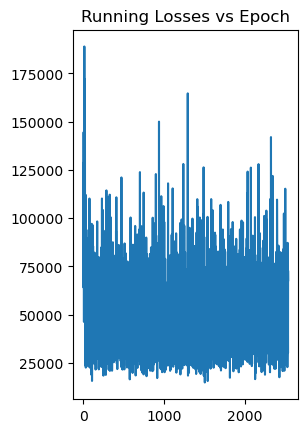

Second Model
epoch: 500 cost: tensor(42548.5273, grad_fn=<MseLossBackward0>)


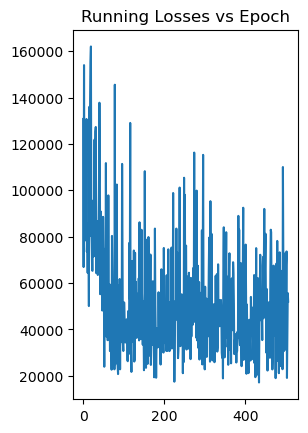

Third Model
epoch: 500 cost: tensor(36457., grad_fn=<MseLossBackward0>)
epoch: 1000 cost: tensor(51351.8320, grad_fn=<MseLossBackward0>)
epoch: 1500 cost: tensor(42102.8516, grad_fn=<MseLossBackward0>)


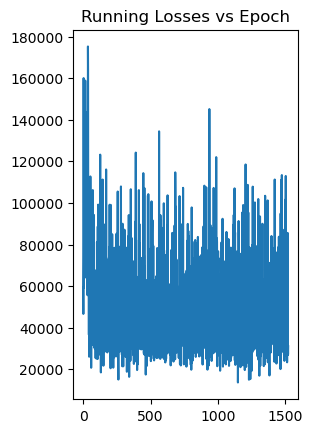

Fourth Model
epoch: 500 cost: tensor(57420.4102, grad_fn=<MseLossBackward0>)
epoch: 1000 cost: tensor(38428.2891, grad_fn=<MseLossBackward0>)
epoch: 1500 cost: tensor(59904.0703, grad_fn=<MseLossBackward0>)
epoch: 2000 cost: tensor(56759.3594, grad_fn=<MseLossBackward0>)
epoch: 2500 cost: tensor(45392.5430, grad_fn=<MseLossBackward0>)
epoch: 3000 cost: tensor(47666.5078, grad_fn=<MseLossBackward0>)
epoch: 3500 cost: tensor(55991.0859, grad_fn=<MseLossBackward0>)
epoch: 4000 cost: tensor(22871.5820, grad_fn=<MseLossBackward0>)
epoch: 4500 cost: tensor(34595.7070, grad_fn=<MseLossBackward0>)
epoch: 5000 cost: tensor(68286.5000, grad_fn=<MseLossBackward0>)


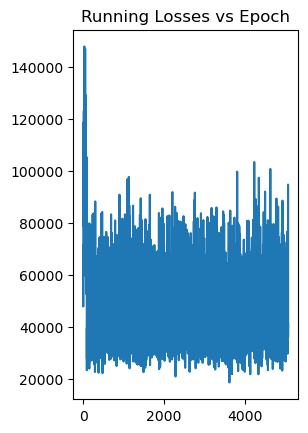

Fifth Model
epoch: 500 cost: tensor(33704.2773, grad_fn=<MseLossBackward0>)
epoch: 1000 cost: tensor(45862.6367, grad_fn=<MseLossBackward0>)
epoch: 1500 cost: tensor(55617.0039, grad_fn=<MseLossBackward0>)
epoch: 2000 cost: tensor(41486.6758, grad_fn=<MseLossBackward0>)
epoch: 2500 cost: tensor(94882.9688, grad_fn=<MseLossBackward0>)


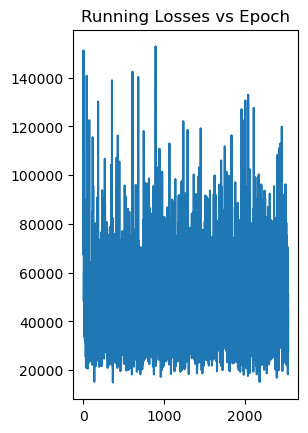

In [70]:
#Simple Encoding
print("First Model")
first_model = DNNModel(input_dim=22, output_dim=1)
first_model = train_model(model=first_model, n_iters=50000, batch_size=50, learning_rate=1e-5)
print("Second Model")
second_model = DNNModel(input_dim=22, output_dim=1)
second_model = train_model(model=second_model, n_iters=10000, batch_size=50, learning_rate=0.9e-5)
print("Third Model")
third_model = DNNModel(input_dim=22, output_dim=1)
third_model = train_model(model=third_model, n_iters=30000, batch_size=50, learning_rate=0.8e-5)
print("Fourth Model")
fourth_model = DNNModel(input_dim=22, output_dim=1)
fourth_model = train_model(model=fourth_model, n_iters=50000, batch_size=100, learning_rate=1.1e-5)
print("Fifth Model")
fifth_model = DNNModel(input_dim=22, output_dim=1)
fifth_model = train_model(model=fifth_model, n_iters=50000, batch_size=50, learning_rate=1e-3)

In [71]:
# Let's use the validation sets on our models
tensor_simple_X_val = torch.Tensor(X_simple_val)
tensor_simple_Y_val = torch.Tensor(Y_simple_val)

y_pred = first_model(tensor_simple_X_val)
cost = loss(y_pred, tensor_simple_Y_val)
print("Cost first model: " + str(cost))

y_pred = second_model(tensor_simple_X_val)
cost = loss(y_pred, tensor_simple_Y_val)
print("Cost second model: " + str(cost))

y_pred = third_model(tensor_simple_X_val)
cost = loss(y_pred, tensor_simple_Y_val)
print("Cost third model: " + str(cost))

y_pred = fourth_model(tensor_simple_X_val)
cost = loss(y_pred, tensor_simple_Y_val)
print("Cost fourth model: " + str(cost))

y_pred = fifth_model(tensor_simple_X_val)
cost = loss(y_pred, tensor_simple_Y_val)
print("Cost fifth model: " + str(cost))

Cost first model: tensor(35751.2383, grad_fn=<MseLossBackward0>)
Cost second model: tensor(35556.8750, grad_fn=<MseLossBackward0>)
Cost third model: tensor(35539.2109, grad_fn=<MseLossBackward0>)
Cost fourth model: tensor(35532.2734, grad_fn=<MseLossBackward0>)
Cost fifth model: tensor(35547.2305, grad_fn=<MseLossBackward0>)


In [74]:
# Testing on our fourth model
y_pred = fourth_model(tensor_simple_X_test)
cost = loss(y_pred, tensor_simple_Y_test)
print("Test fourth model: " + str(cost))

Test fourth model: tensor(34797.4531, grad_fn=<MseLossBackward0>)


In [79]:
class DropoutModel(nn.Module):
    def __init__(self, input_dim=22, output_dim=1):
        super(DropoutModel, self).__init__()
        
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        inter_layer_size1 = 16
        self.fc1 = nn.Linear(input_dim, inter_layer_size1)
        inter_layer_size2 = int((inter_layer_size1 + output_dim) / 2)
        self.fc2 = nn.Linear(inter_layer_size1, inter_layer_size2)
        inter_layer_size3 = int((inter_layer_size2 + output_dim) / 2)
        self.fc3 = nn.Linear(inter_layer_size2, inter_layer_size3)
        self.fc_last = nn.Linear(inter_layer_size3, output_dim)
    
    def forward(self, x):
        out = self.dropout(x)
        out = self.fc1(out)
        out = self.relu(out)
        
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.relu(out)
        
        out = self.dropout(out)
        out = self.fc3(out)
        out = self.relu(out)
        
        out = self.dropout(out)
        out = self.fc_last(out)
        return out

First Model
epoch: 500 cost: tensor(38623.5859, grad_fn=<MseLossBackward0>)
epoch: 1000 cost: tensor(64826.9727, grad_fn=<MseLossBackward0>)
epoch: 1500 cost: tensor(50452.6016, grad_fn=<MseLossBackward0>)
epoch: 2000 cost: tensor(80554.8984, grad_fn=<MseLossBackward0>)
epoch: 2500 cost: tensor(50969.5234, grad_fn=<MseLossBackward0>)


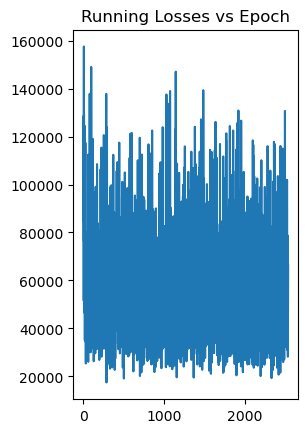

Second Model
epoch: 500 cost: tensor(58065.5469, grad_fn=<MseLossBackward0>)


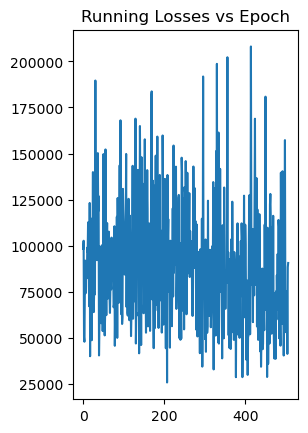

Third Model
epoch: 500 cost: tensor(47729.3789, grad_fn=<MseLossBackward0>)
epoch: 1000 cost: tensor(55590.5820, grad_fn=<MseLossBackward0>)
epoch: 1500 cost: tensor(72391.5078, grad_fn=<MseLossBackward0>)


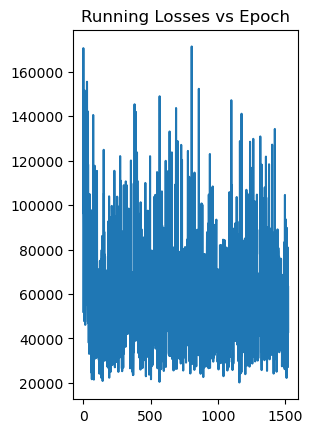

Fourth Model
epoch: 500 cost: tensor(84429.9062, grad_fn=<MseLossBackward0>)
epoch: 1000 cost: tensor(59755.1523, grad_fn=<MseLossBackward0>)
epoch: 1500 cost: tensor(42444.1250, grad_fn=<MseLossBackward0>)
epoch: 2000 cost: tensor(62173.8281, grad_fn=<MseLossBackward0>)
epoch: 2500 cost: tensor(37526.5820, grad_fn=<MseLossBackward0>)
epoch: 3000 cost: tensor(49735.8477, grad_fn=<MseLossBackward0>)
epoch: 3500 cost: tensor(45825.3438, grad_fn=<MseLossBackward0>)
epoch: 4000 cost: tensor(36993.5312, grad_fn=<MseLossBackward0>)
epoch: 4500 cost: tensor(38568.7773, grad_fn=<MseLossBackward0>)
epoch: 5000 cost: tensor(47819.4883, grad_fn=<MseLossBackward0>)


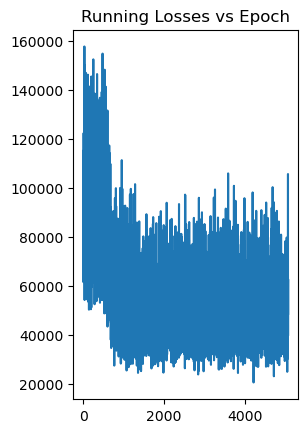

Fifth Model
epoch: 500 cost: tensor(116614.8438, grad_fn=<MseLossBackward0>)
epoch: 1000 cost: tensor(39176.2227, grad_fn=<MseLossBackward0>)
epoch: 1500 cost: tensor(53274.3320, grad_fn=<MseLossBackward0>)
epoch: 2000 cost: tensor(82844.0703, grad_fn=<MseLossBackward0>)
epoch: 2500 cost: tensor(39936.6523, grad_fn=<MseLossBackward0>)


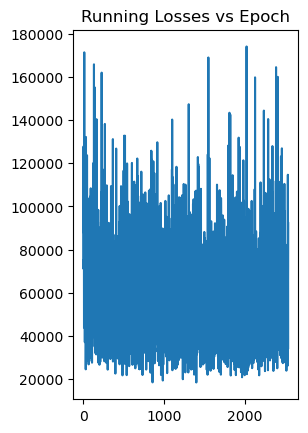

In [80]:
#simple Encoding
print("First Model")
first_model = DropoutModel(input_dim=22, output_dim=1)
first_model = train_model(model=first_model, n_iters=50000, batch_size=50, learning_rate=1e-5)
print("Second Model")
second_model = DropoutModel(input_dim=22, output_dim=1)
second_model = train_model(model=second_model, n_iters=10000, batch_size=50, learning_rate=0.9e-5)
print("Third Model")
third_model = DropoutModel(input_dim=22, output_dim=1)
third_model = train_model(model=third_model, n_iters=30000, batch_size=50, learning_rate=0.8e-5)
print("Fourth Model")
fourth_model = DropoutModel(input_dim=22, output_dim=1)
fourth_model = train_model(model=fourth_model, n_iters=50000, batch_size=100, learning_rate=1.1e-5)
print("Fifth Model")
fifth_model = DropoutModel(input_dim=22, output_dim=1)
fifth_model = train_model(model=fifth_model, n_iters=50000, batch_size=50, learning_rate=0.8e-5)

In [81]:
# Let's use the validation sets on our models
tensor_simple_X_val = torch.Tensor(X_simple_val)
tensor_simple_Y_val = torch.Tensor(Y_simple_val)

y_pred = first_model(tensor_simple_X_val)
cost = loss(y_pred, tensor_simple_Y_val)
print("Cost first model: " + str(cost))

y_pred = second_model(tensor_simple_X_val)
cost = loss(y_pred, tensor_simple_Y_val)
print("Cost second model: " + str(cost))

y_pred = third_model(tensor_simple_X_val)
cost = loss(y_pred, tensor_simple_Y_val)
print("Cost third model: " + str(cost))

y_pred = fourth_model(tensor_simple_X_val)
cost = loss(y_pred, tensor_simple_Y_val)
print("Cost fourth model: " + str(cost))

y_pred = fifth_model(tensor_simple_X_val)
cost = loss(y_pred, tensor_simple_Y_val)
print("Cost fifth model: " + str(cost))

Cost first model: tensor(38446.5156, grad_fn=<MseLossBackward0>)
Cost second model: tensor(55397.5117, grad_fn=<MseLossBackward0>)
Cost third model: tensor(39699.1523, grad_fn=<MseLossBackward0>)
Cost fourth model: tensor(37054.5117, grad_fn=<MseLossBackward0>)
Cost fifth model: tensor(38911.3984, grad_fn=<MseLossBackward0>)


In [82]:
# Testing on our fifth model
y_pred = fifth_model(tensor_simple_X_test)
cost = loss(y_pred, tensor_simple_Y_test)
print("Test fifth model: " + str(cost))

Test fifth model: tensor(41986.8438, grad_fn=<MseLossBackward0>)
